### Problem Statement:

- 1) Categorize & analyse the reviews to calculate the percentage of positive & negative reviews.
- 2) Calculate the total rating on a scale of 5 for each category.
- 3) Create a Ranking table for each Mobile phone based on each category and overall ranking.

### Approach:

- The classical machine learning tasks like 
    - Data Exploration 
    - Data Cleaning 
    - Feature Engineering 
    - Model Building 
    - Model Testing
    
- Use Natural Language Processing for analysing the reviews.

### Results:

    - Develop a machine learning model to analyse & calculate the percentage of positive & negative reviews. 
    - Model should also result in a total rating score on a scale of 5.

### Step 1: Read in data 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
#read in data
df = pd.read_csv("Flipkart_Amazon Mobile Reviews.csv")
df.head()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [3]:
print(df.shape)

(23777, 5)


In [4]:
df['rating'].unique()

array(['1.0 out of 5 stars', '2.0 out of 5 stars', '5.0 out of 5 stars',
       '3.0 out of 5 stars', '4.0 out of 5 stars'], dtype=object)

In [6]:
print('List of Unique Products reviewed: ', df['Product Name'].unique())
print('       =================================       ')
print('No of Products reviewed: ', df['Product Name'].nunique())

List of Unique Products reviewed:  ['OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)'
 'OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)'
 'realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)'
 'Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM '
 'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)'
 'Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)' 'Samsung Galaxy M32'
 'vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)']
No of Products reviewed:  8


In [7]:
#df['rating'][0][:1]
#Taking out the rating from the string 
df['rating'] = df['rating'].apply(lambda x: int(x[:1]))

#dropping the Unnamed: 0 column
df = df.drop('Unnamed: 0', axis=1)

df.head()

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review-Title  23775 non-null  object
 1   rating        23777 non-null  int64 
 2   Review-Body   23160 non-null  object
 3   Product Name  23777 non-null  object
dtypes: int64(1), object(3)
memory usage: 743.2+ KB


In [9]:
df.describe()

,rating
count,23777.000000
mean,3.490558
std,1.578505
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [10]:
df['Review-Title'].isnull().sum()

2

In [11]:
df['Review-Body'].isna().sum()

617

In [12]:
df[df['Review-Title'].isnull()]

,Review-Title,rating,Review-Body,Product Name
7350,NaN,1,Poor set,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)"
20171,NaN,5,NaN,"Redmi Note 11 (Space Black, 4GB RAM, 64GB Stor..."


In [13]:
df[df['Review-Body'].isnull()]

,Review-Title,rating,Review-Body,Product Name
108,Super mobile,5,NaN,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
336,"1+ ka y model price k hisab s very good, cemar...",5,NaN,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
525,The phone has hitting issue and Hangs while wr...,1,NaN,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
554,Nice pic,4,NaN,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
566,It's a master piece item.No lag.Excellent batt...,5,NaN,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...
23745,This mobile is very Awesome and Camera 📷 Quali...,5,NaN,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23746,Good,5,NaN,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23747,Very good phone in this price👍,4,NaN,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23748,I love this mobile camera 😍,4,NaN,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


In [14]:
df[(df['Review-Title'].isnull()) & (df['Review-Body']).isnull()]
#Only one row that lacks both the Title and Body, Hopefully drop it

,Review-Title,rating,Review-Body,Product Name
20171,NaN,5,NaN,"Redmi Note 11 (Space Black, 4GB RAM, 64GB Stor..."


### Observations:

- Column Unnamed: 0 doesn't provide any info - Dropping column
- Rating column is in string format - Convert to float or int
- Product Name specifies the certain products that are reviewed
- There are 8 Unique products in this dataset
- Null values: 2 in Title and 617 in Body
- Only dropped row where both Title and Body are null

### Assumption:

- Since, Title is a subject of the Body, we can concatenate the Title and Body together in a new column
- NLP will be done only on newly concatenated column, to keep it in one place


In [15]:
df['rating'].value_counts()

5    9399
1    5231
4    4886
3    2703
2    1558
Name: rating, dtype: int64

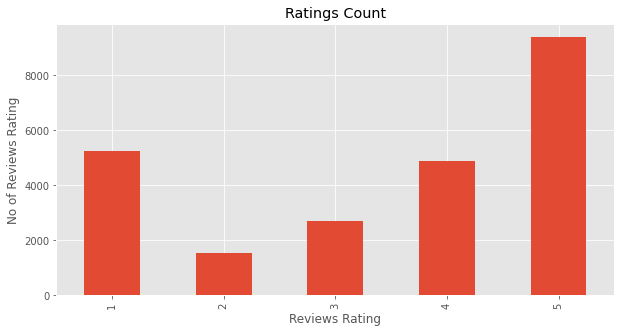

In [16]:
ax = df['rating'].value_counts().sort_index()\
.plot(kind='bar', title='Ratings Count',figsize=(10, 5))

ax.set_xlabel('Reviews Rating')
ax.set_ylabel('No of Reviews Rating')
plt.show()

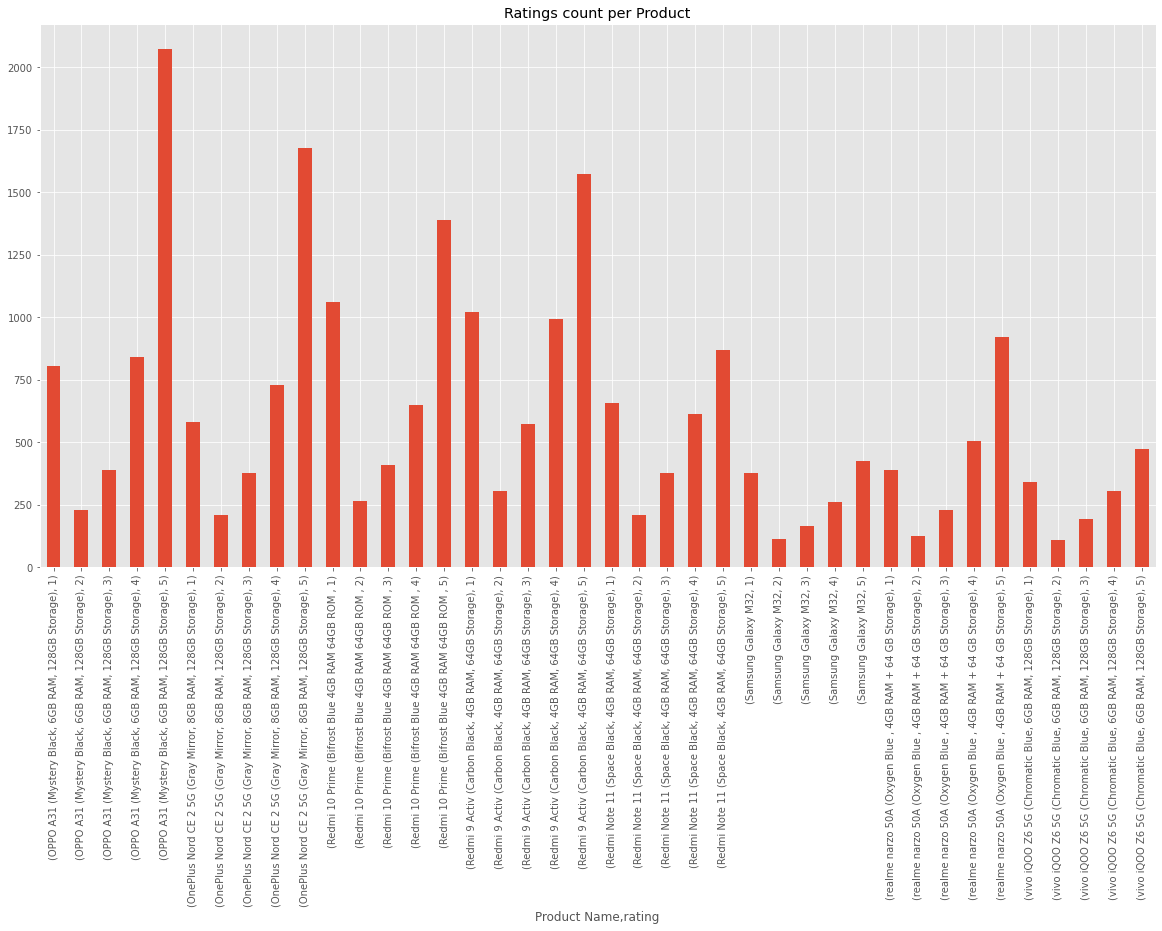

In [17]:
df[['Product Name','rating']].value_counts(sort=False).plot(kind='bar', title='Ratings count per Product',figsize=(20, 10))
plt.show()

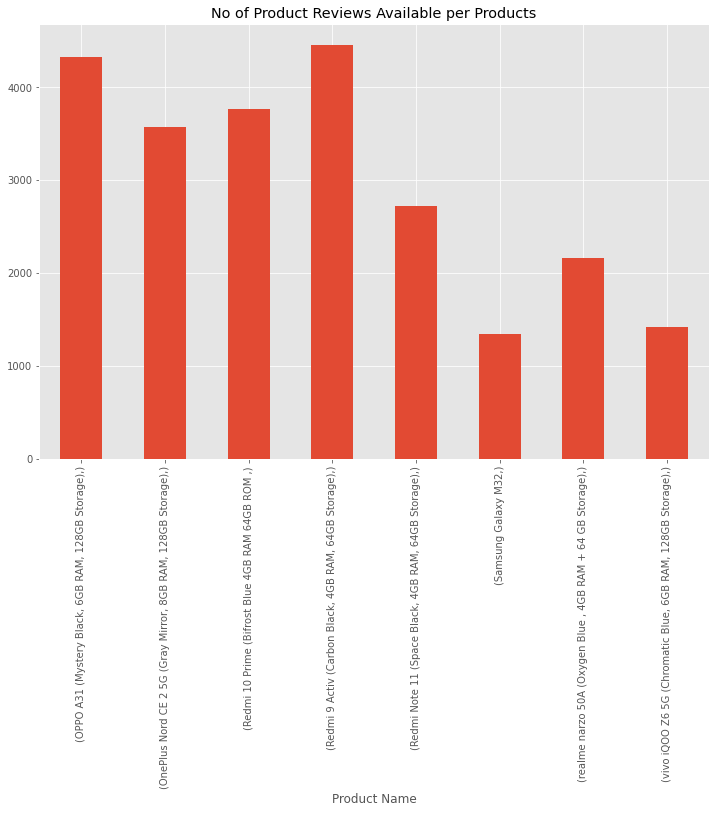

In [18]:
pr = df[['Product Name']].value_counts(sort=False).plot(kind='bar', 
                                                   title='No of Product Reviews Available per Products',figsize=(12, 8))
plt.show()

In [19]:
#Products with most ratings in each category
df[['Product Name', 'rating']].groupby('rating').count()

,Product Name
rating,
1,5231
2,1558
3,2703
4,4886
5,9399


In [20]:
df.shape

(23777, 4)

In [21]:
lst =[]
for i in range(len(df)):
    if df['Review-Body'][i] == '':
        lst.append(df['Review-Title'][i]) 
    else:
        lst.append(str(df['Review-Title'][i]) +" "+str(df['Review-Body'][i]))


In [22]:
df['Review-Content'] = lst
df.head()

,Review-Title,rating,Review-Body,Product Name,Review-Content
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Worst phone ever Hang problem
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Ok !!! Not up to the mark I'm writing this rev...
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Awesome look Camera is so good n very fast pho...
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",One plus losing is originality!!! The media co...
4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Read I got my delivery on 23 feb when I unboxe...


In [ ]:
#df.drop(index=df[(df['Review-Title'].isnull()) & (df['Review-Body']).isnull()].index, inplace=True)
#df.reset_index(drop=True)
#df.head()

In [23]:
df[['Product Name', 'Review-Content', 'rating']]

,Product Name,Review-Content,rating
0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Worst phone ever Hang problem,1
1,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Ok !!! Not up to the mark I'm writing this rev...,2
2,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Awesome look Camera is so good n very fast pho...,5
3,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",One plus losing is originality!!! The media co...,3
4,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Read I got my delivery on 23 feb when I unboxe...,1
...,...,...,...
23772,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",Batten in this rangee Must he Bhai iss range m...,4
23773,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",Good mobile Good product,4
23774,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",Good camera Good,5
23775,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",Warest mobile Don't buy this mobile phone mone...,1


In [24]:
#import stopwords

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#import textblob
from textblob import Word, TextBlob

In [25]:
stop_words = stopwords.words('english')
import re
#print(stop_words)

In [27]:
wnl = WordNetLemmatizer()

In [28]:
def text_transform(text_column):
    corpus =[]
    for item in text_column:
        cleaned = re.sub('[^a-zA-Z]', ' ', str(item))
        cleaned = cleaned.lower()
        cleaned = cleaned.split()
        cleaned = [wnl.lemmatize(word) for word in cleaned if word not in set(stopwords.words('english'))]
        corpus.append(" ".join(str(x) for x in cleaned))
    return corpus

In [29]:
corpus = text_transform(df['Review-Content'])

In [31]:
corpus[2]

'awesome look camera good n fast phone back look awesomewith dis price segment worth n important thing phone dedicated memory card slot think dis first one plus phone dedicated slot memory cardbattery backup also good n wit help w charger u charge ur phone frm minsit super vooc charger frm dat u charge ur phone fastvery smooth touch n fast phone u play game laginternet connectivity also fast n lightning wit jio sim u c hav pasted one photo showing downloading speed mbps wit cellular networki think everyone want buy dis phone go iti think oneplus launched dis phone lot good feature n important thing price lessi recommendjust go itthank u oneplus n amazon dis wonderful product'

In [92]:
df['Cleaned-Content'] = corpus
df.head()

,Review-Title,rating,Review-Body,Product Name,Review-Content,Cleaned-Content
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Worst phone ever Hang problem,worst phone ever hang problem
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Ok !!! Not up to the mark I'm writing this rev...,ok mark writing review using day honest normal...
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Awesome look Camera is so good n very fast pho...,awesome look camera good n fast phone back loo...
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",One plus losing is originality!!! The media co...,one plus losing originality medium could loade...
4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Read I got my delivery on 23 feb when I unboxe...,read got delivery feb unboxed phone display da...


==================================================================================================================

==================================================================================================================

In [33]:
from wordcloud import WordCloud, STOPWORDS

### Sentiment Scoring

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

senti_ana = SentimentIntensityAnalyzer()

In [38]:
senti_ana.polarity_scores('I am happy')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [39]:
#Sentiment Intensity Analyzer is run on text to get polarity of it.
#Compound is the aggregate value of all the sentiment
#-1 being negative to +1 being positive, 0 is neutral

senti_ana.polarity_scores(df['Review-Content'][0])

{'neg': 0.694, 'neu': 0.306, 'pos': 0.0, 'compound': -0.7783}

In [40]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review-Content']
    proid = i
    res[proid] = senti_ana.polarity_scores(text)

  0%|          | 0/23777 [00:00<?, ?it/s]

In [41]:
df2 = pd.DataFrame(res).T
df2.head()

,neg,neu,pos,compound
0,0.694,0.306,0.000,-0.7783
1,0.112,0.806,0.082,-0.5138
2,0.012,0.751,0.237,0.9899
3,0.048,0.757,0.195,0.9770
4,0.054,0.866,0.081,0.2846


In [42]:
df2 = df.join(df2)
df2.head()

,Review-Title,rating,Review-Body,Product Name,Review-Content,Cleaned-Content,neg,neu,pos,compound
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Worst phone ever Hang problem,worst phone ever hang problem,0.694,0.306,0.000,-0.7783
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Ok !!! Not up to the mark I'm writing this rev...,ok mark writing review using day honest normal...,0.112,0.806,0.082,-0.5138
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Awesome look Camera is so good n very fast pho...,awesome look camera good n fast phone back loo...,0.012,0.751,0.237,0.9899
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",One plus losing is originality!!! The media co...,one plus losing originality medium could loade...,0.048,0.757,0.195,0.9770
4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Read I got my delivery on 23 feb when I unboxe...,read got delivery feb unboxed phone display da...,0.054,0.866,0.081,0.2846


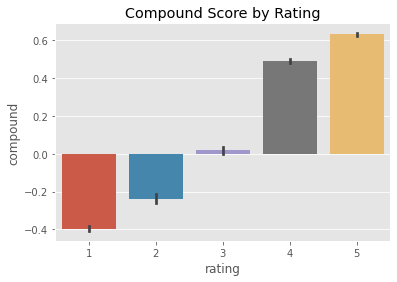

In [43]:
ax = sns.barplot(data=df2, x='rating', y='compound')
ax.set_title('Compound Score by Rating')
plt.show()

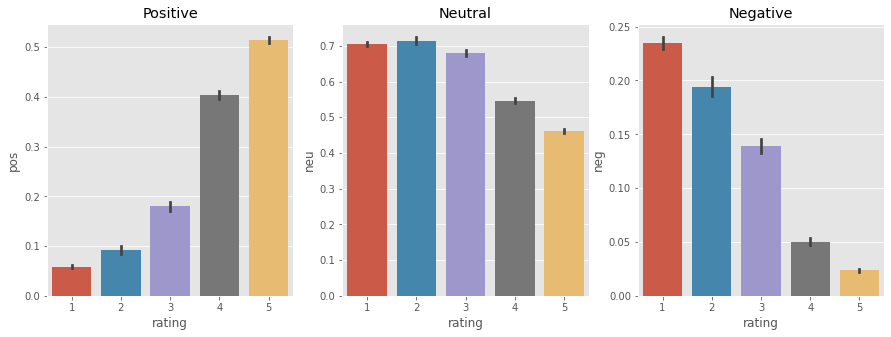

In [44]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=df2, x='rating', y='pos', ax=axs[0])
sns.barplot(data=df2, x='rating', y='neu', ax=axs[1])
sns.barplot(data=df2, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

- The Compound score corresponds to the rating on the products
    - The lesser the rating is the negative the compound score and vice-versa


==================================================================================================================

==================================================================================================================


## Objective Achieving

### 1) Categorize & analyse the reviews to calculate the percentage of positive & negative reviews.


In [45]:
df2.head()

,Review-Title,rating,Review-Body,Product Name,Review-Content,Cleaned-Content,neg,neu,pos,compound
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Worst phone ever Hang problem,worst phone ever hang problem,0.694,0.306,0.000,-0.7783
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Ok !!! Not up to the mark I'm writing this rev...,ok mark writing review using day honest normal...,0.112,0.806,0.082,-0.5138
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Awesome look Camera is so good n very fast pho...,awesome look camera good n fast phone back loo...,0.012,0.751,0.237,0.9899
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",One plus losing is originality!!! The media co...,one plus losing originality medium could loade...,0.048,0.757,0.195,0.9770
4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Read I got my delivery on 23 feb when I unboxe...,read got delivery feb unboxed phone display da...,0.054,0.866,0.081,0.2846


In [46]:
df2['classify'] = df2['compound'].apply(lambda a: 'positive' if a>0.0 else 'negative')

In [47]:
df2.head()

,Review-Title,rating,Review-Body,Product Name,Review-Content,Cleaned-Content,neg,neu,pos,compound,classify
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Worst phone ever Hang problem,worst phone ever hang problem,0.694,0.306,0.000,-0.7783,negative
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Ok !!! Not up to the mark I'm writing this rev...,ok mark writing review using day honest normal...,0.112,0.806,0.082,-0.5138,negative
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Awesome look Camera is so good n very fast pho...,awesome look camera good n fast phone back loo...,0.012,0.751,0.237,0.9899,positive
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",One plus losing is originality!!! The media co...,one plus losing originality medium could loade...,0.048,0.757,0.195,0.9770,positive
4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Read I got my delivery on 23 feb when I unboxe...,read got delivery feb unboxed phone display da...,0.054,0.866,0.081,0.2846,positive


In [48]:
classified = df2['classify'].unique()
classified

array(['negative', 'positive'], dtype=object)

In [49]:
classified_counts = {}
for i in classified:
    classified_counts[i] = df2[df2['classify'] == i].count()[1]

for item in classified_counts:
    #print(item, classified_counts.get(item))
    print(f'No of {item} Reviews: ',classified_counts.get(item))


No of negative Reviews:  8923
No of positive Reviews:  14854


In [50]:
#Percentage of reviews
for item in classified_counts:
    #print(item, classified_counts.get(item))
    print(f'Percentage of {item} Reviews: {round((classified_counts.get(item)/len(df2))*100, 2)}%',)


Percentage of negative Reviews: 37.53%
Percentage of positive Reviews: 62.47%


In [53]:
postive_review = df2[df2['classify']=='positive']
postive_review.head()

,Review-Title,rating,Review-Body,Product Name,Review-Content,Cleaned-Content,neg,neu,pos,compound,classify
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Awesome look Camera is so good n very fast pho...,awesome look camera good n fast phone back loo...,0.012,0.751,0.237,0.9899,positive
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",One plus losing is originality!!! The media co...,one plus losing originality medium could loade...,0.048,0.757,0.195,0.9770,positive
4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Read I got my delivery on 23 feb when I unboxe...,read got delivery feb unboxed phone display da...,0.054,0.866,0.081,0.2846,positive
5,Fantastic but some bug fixes required!,4,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Fantastic but some bug fixes required! The med...,fantastic bug fix required medium could loaded...,0.022,0.736,0.242,0.9823,positive
6,A good choice for upgrade,5,Nord CE 2 is a decent choice for someone looki...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",A good choice for upgrade Nord CE 2 is a decen...,good choice upgrade nord ce decent choice some...,0.044,0.806,0.150,0.9947,positive


In [54]:
negative_review = df2[df2['classify']=='negative']
negative_review.head()

,Review-Title,rating,Review-Body,Product Name,Review-Content,Cleaned-Content,neg,neu,pos,compound,classify
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Worst phone ever Hang problem,worst phone ever hang problem,0.694,0.306,0.000,-0.7783,negative
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Ok !!! Not up to the mark I'm writing this rev...,ok mark writing review using day honest normal...,0.112,0.806,0.082,-0.5138,negative
10,bakwas mobile hai,1,bakwas mobile hai,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",bakwas mobile hai bakwas mobile hai,bakwas mobile hai bakwas mobile hai,0.000,1.000,0.000,0.0000,negative
18,Hang problem,2,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Hang problem The media could not be loaded.\n ...,hang problem medium could loaded starting day ...,0.085,0.869,0.046,-0.3612,negative
19,Disappoint with build quality and display,1,Phone's display and camera not upto the mark w...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Disappoint with build quality and display Phon...,disappoint build quality display phone display...,0.139,0.861,0.000,-0.7841,negative


In [61]:
df['Review-Content'].apply(lambda x: len(x.split(' '))).sum()

475143

In [60]:
df['Cleaned-Content'].apply(lambda x: len(x.split(' '))).sum()

286217

Text(0.5, 1.0, 'Most frequent words in Postive Reviews')

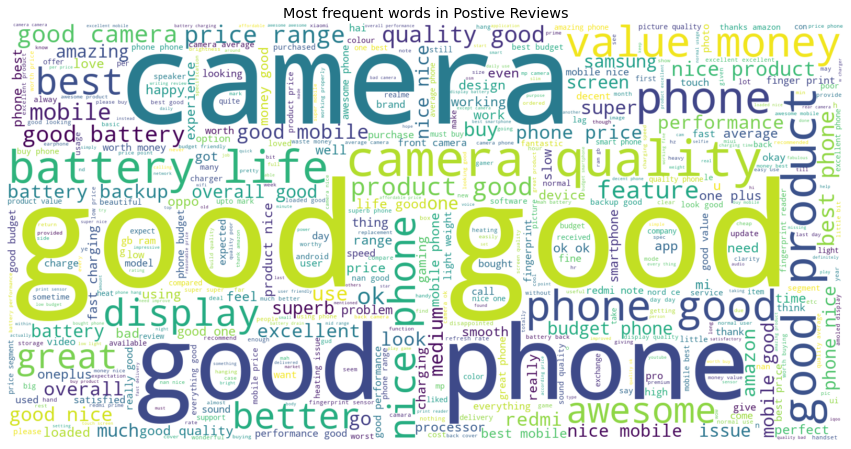

In [58]:
text = " ".join([word for word in postive_review['Cleaned-Content']])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(background_color='white', max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Postive Reviews')

Text(0.5, 1.0, 'Most frequent words in Negative Reviews')

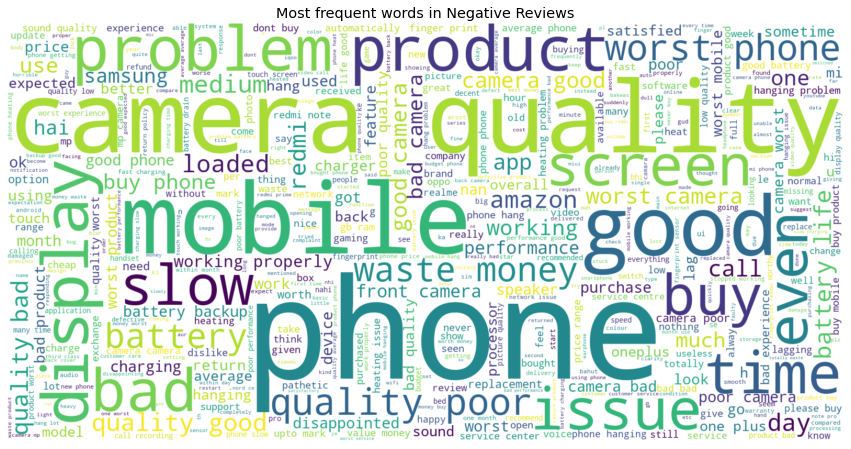

In [59]:
text = " ".join([word for word in negative_review['Cleaned-Content']])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(background_color='white', max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative Reviews')

### Observations:

- Percentage of negative Reviews: 37.53%
- Percentage of positive Reviews: 62.47%

In [62]:
df_model = df[['Product Name', 'Cleaned-Content', 'rating']]
df_model.head()

,Product Name,Cleaned-Content,rating
0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",worst phone ever hang problem,1
1,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",ok mark writing review using day honest normal...,2
2,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",awesome look camera good n fast phone back loo...,5
3,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",one plus losing originality medium could loade...,3
4,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",read got delivery feb unboxed phone display da...,1


### Naive Bayes Classifier

In [64]:
# import libraries pre-requisite to ML model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [65]:
X = df_model['Cleaned-Content']
y = df_model['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [66]:
#import naive Bayes classifier pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [67]:
nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

In [68]:
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [69]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

Wall time: 112 ms


In [72]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5693860386879731
              precision    recall  f1-score   support

           1       0.62      0.84      0.71      1550
           2       0.00      0.00      0.00       468
           3       0.25      0.00      0.00       822
           4       0.34      0.06      0.11      1494
           5       0.56      0.95      0.71      2800

    accuracy                           0.57      7134
   macro avg       0.35      0.37      0.31      7134
weighted avg       0.45      0.57      0.46      7134



c:\users\amin0\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\amin0\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\amin0\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## TFIDF and Linear SVM


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [74]:
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,3), analyzer='char')

In [75]:
X = tfidf.fit_transform(df_model['Cleaned-Content'])
y = df_model['rating']

In [76]:
X.shape, y.shape

((23777, 7926), (23777,))

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
X_train.shape, X_test.shape

((19021, 7926), (4756, 7926))

In [79]:
classify = LinearSVC()
classify.fit(X_train, y_train)

LinearSVC()

In [80]:
y_pred = classify.predict(X_test)

In [82]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5836837678721615
              precision    recall  f1-score   support

           1       0.63      0.82      0.71      1083
           2       0.13      0.02      0.04       289
           3       0.33      0.17      0.23       551
           4       0.39      0.20      0.27       990
           5       0.64      0.86      0.73      1843

    accuracy                           0.58      4756
   macro avg       0.42      0.42      0.40      4756
weighted avg       0.52      0.58      0.53      4756



### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

In [85]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])

In [88]:
X = df_model['Cleaned-Content']
y = df_model['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [89]:
logreg.fit(X_train, y_train)

c:\users\amin0\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [91]:
%%time

y_pred = logreg.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5539669189795347
              precision    recall  f1-score   support

           1       0.65      0.70      0.68      1592
           2       0.16      0.11      0.13       469
           3       0.31      0.25      0.28       806
           4       0.34      0.22      0.27      1431
           5       0.64      0.80      0.71      2836

    accuracy                           0.55      7134
   macro avg       0.42      0.42      0.41      7134
weighted avg       0.52      0.55      0.53      7134

Wall time: 174 ms


## Conclusion

- Used three classification models:
    - Naive Bayes - Got 57% accuracy
    - LinearSVM - Got 58% accuracy
    - LogisticRegression - Got 55% accuracy